In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test/test.csv")

In [3]:
print(train.shape)
print(test.shape)

(14993, 24)
(3972, 23)


In [4]:
train_des = train["Description"]
test_des = test["Description"]

#### include training and testing data

In [5]:
description = train_des.append(test_des)

In [6]:
description.shape

(18965,)

In [7]:
description.head()

0    Nibble is a 3+ month old ball of cuteness. He ...
1    I just found it alone yesterday near my apartm...
2    Their pregnant mother was dumped by her irresp...
3    Good guard dog, very alert, active, obedience ...
4    This handsome yet cute boy is up for adoption....
Name: Description, dtype: object

In [8]:
description.tail()

3967    Found on the streets. Treated for mange. They ...
3968    Very good guard dog. Healthy was found in Fron...
3969    these cat's mother was killed when they was ne...
3970    smokey is good family pet. very obedient,so lo...
3971    Found abandoned with the mother at nearby shop...
Name: Description, dtype: object

#### deal with nan

In [9]:
description.isnull().sum()

13

In [10]:
description.fillna(' ', inplace=True)

In [11]:
description.isnull().sum()

0

In [12]:
def is_chinese(uchar):         
    if u'\u4e00' <= uchar<=u'\u9fff':
        return True
    else:
        return False

#### divide data into two to avoid get banned by translater

In [13]:
first_seg = description[:9500]
print(len(first_seg))

9500


In [14]:
second_seg = description[9500:]
print(len(second_seg))

9465


#### translate chinese description into English

In [15]:
from googletrans import Translator

In [16]:
translator = Translator()

In [17]:
def get_translation(ori_text):
    texts = ori_text.copy()
    for i, tx in enumerate(texts):

        isChinese = is_chinese(tx)
        if isChinese:
            try:
                trans_obj = translator.translate(tx, dest='en', src='zh-cn')
                texts.iloc[i] = trans_obj.text
            except BaseException as e:
                print("trans_err: ", i, tx)
                print(e)
        else:
            pass
    return texts

In [18]:
translation_list = get_translation(first_seg)

trans_err:  7255 好乖的猫咪，不舍得让她在外面流浪，希望您可以给她一个温暖的家，感恩🙏🏻 A very gentle and sweet kitty,hope you can give her a forever home, thank you.
Expecting value: line 1 column 1 (char 0)


In [19]:
### manually translate description with error
translation_list.iloc[7255] = "A very gentle and sweet kitty,hope you can give her a forever home, thank you."

In [20]:
translation_list1 = get_translation(second_seg)

trans_err:  1875 有人要领养猫咪吗？ 大概6,7个月，母猫，已结扎，打了第一支预防针，一星期后要原放了。每一次要原放猫咪心情都七上八下的，很不忍心，无奈！唉！希望有缘人可以给孩子一个🏠。 蒲种区........
Expecting value: line 1 column 1 (char 0)


In [21]:
### manually translate description with error
translation_list1.iloc[1875] = 'Does anyone want to adopt a cat? About 6 or 7 months, the female cat, has been ligated, hit the first vaccination, and will be released in a week. Every time I want to put my cat in the mood, I can’t bear it, but I can’t help it! Ugh! I hope that some people can give their children a jealousy. Puchong District'

#### combine all translated data and check head and tail content

In [22]:
after_trans = translation_list.append(translation_list1)
print(len(after_trans))

18965


In [23]:
after_trans.head()

0    Nibble is a 3+ month old ball of cuteness. He ...
1    I just found it alone yesterday near my apartm...
2    Their pregnant mother was dumped by her irresp...
3    Good guard dog, very alert, active, obedience ...
4    This handsome yet cute boy is up for adoption....
Name: Description, dtype: object

In [24]:
after_trans.tail()

3967    Found on the streets. Treated for mange. They ...
3968    Very good guard dog. Healthy was found in Fron...
3969    these cat's mother was killed when they was ne...
3970    smokey is good family pet. very obedient,so lo...
3971    Found abandoned with the mother at nearby shop...
Name: Description, dtype: object

#### add translated description into datafram

In [25]:
def add_to_df(data, c_name):
    train_split = data[:14993]
    test_split = data[14993:]
    train[c_name] = train_split.values
    test[c_name] = test_split.values
    print(train.head(2))
    print(test.head(2))

In [26]:
add_to_df(after_trans, 'trans_desc')

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   

   MaturitySize  ...  Quantity  Fee  State                         RescuerID  \
0             1  ...         1  100  41326  8480853f516546f6cf33aa88cd76c379   
1             2  ...         1    0  41401  3082c7125d8fb66f7dd4bff4192c8b14   

   VideoAmt                                        Description      PetID  \
0         0  Nibble is a 3+ month old ball of cuteness. He ...  86e1089a3   
1         0  I just found it alone yesterday near my apartm...  6296e909a   

   PhotoAmt AdoptionSpeed                                         trans_desc  
0       1.0             2  Nibble is a 3+ month old ball of cuteness. He ...  
1       2.0             0  I just found it alone yesterday near my apartm...  

[2 rows x 25 columns]
   Type          Name  Age  Breed1 

In [27]:
# stop_w = {'had', '?', 'couldn', 'own', 'he', 'these', 'hasn', 'nor', 'dog', 'down', 'by', 'wasn', 'his', 'ours',
#               'are', 'Please', '&', '3', 'until', 'aren', "you'll", 'theirs', 'why', 'further', 'yourself',
#               'ourselves', '==================================================', 'give', 'again', "shouldn't",
#               '...', "won't", 'against', 'off', 'o', 'ma', 'her', 'once', 'haven', 'have', '.', 'itself', "you'd",
#               'them', 'm', 'those', 'has', 'out', 'because', 'it', 'from', 'when', 'hers', 'for', 've', "mustn't",
#               'needn', "you've", 'himself', 'where', 'each', 'does', "couldn't", "hadn't", 'with', "n't", 'am',
#               'should', "you're", ')', 'our', "shan't", "she's", 'isn', 'your', 'there', 'its', 'after', 'is',
#               'yourselves', 'all', 'which', 'and', "haven't", 'more', 'up', 'mustn', 'not', 'an', 'before', 'you',
#               'some', "wouldn't", 'find', 'were', 'she', 'what', 'both', 'or', 'shan', 'such', 'the', 'we',
#               "mightn't", 'that', "'s", 'as', 'herself', 'too', 'if', "didn't", 'while', 's', 'this', 'only', 'under',
#               'during', 'mightn', '-', 'puppy', 'did', "aren't", 'of', 'shouldn', "that'll", 'any', 'few', 'about',
#               'i', 'ain', "don't", 'below', 'in', 'their', 'being', "hasn't", 'This', 'above', 'She', '2', 'will',
#               'yours', ',', 'was', 'didn', 'kitten', 'into', 'hadn', 'me', 'll', 'been', 'can', "needn't", 'through',
#               'The', 'weren', '(', 'they', 'most', 'just', 'but', 'd', 'I', 'who', ':', 'other', 'very',
#               'found', 'themselves', '--', '!', 'home', 'same', 'than', "should've", 'a', 'so', 'how', 'doesn',
#               'between', 'won', "/'", 'He', 'wouldn', 'whom', 'him', 'We', "weren't", 'no', 'take', 'over', "wasn't",
#               'to', 'be', 'now', 'cat', 're', "it's", 'having', "doesn't", 'don', 'at', 'on', 'then', 'myself', 'here',
#               "isn't", 'y', 'please', 'do', 't', 'doing', 'my', 'cats', 'xx',
#           '___________________________________________________'}

#### TF-IDF and decomposition (here we get first 10 components)

In [27]:
# tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 0.03)
tfidf = vectorizer.fit_transform(after_trans)

In [28]:
from sklearn.decomposition import TruncatedSVD
n_components = 100
tsvd = TruncatedSVD(n_components=n_components)
tsvd_result = tsvd.fit_transform(tfidf)

In [29]:
print(tsvd_result.shape)
print(tsvd.explained_variance_ratio_)
print(tsvd_result)

(18965, 100)
[0.01071213 0.02892911 0.02756955 0.02452338 0.01882002 0.01862574
 0.01693355 0.01539339 0.01471959 0.01412999 0.01399633 0.01385101
 0.01373969 0.01309817 0.0124615  0.01209028 0.01170602 0.01142621
 0.01123687 0.01090908 0.01060678 0.01036192 0.01030329 0.01003128
 0.00999283 0.00984638 0.00948974 0.00945657 0.00931554 0.00919457
 0.0090966  0.00893956 0.00870177 0.00844811 0.00837035 0.00824876
 0.00816253 0.00798287 0.00795346 0.00772559 0.00764185 0.00757077
 0.00741161 0.00725917 0.00722453 0.00715738 0.00704053 0.00692393
 0.00678426 0.00673337 0.00666859 0.00657107 0.00649423 0.00647099
 0.00641897 0.00634278 0.00623371 0.00620686 0.00616674 0.00607102
 0.00606768 0.00604848 0.00587693 0.00585102 0.00581999 0.00575285
 0.00569299 0.0056003  0.00556028 0.00548377 0.00543796 0.00539539
 0.00532816 0.00521701 0.00515791 0.00508675 0.00505039 0.00501883
 0.00493436 0.00491358 0.00485744 0.00485121 0.00475495 0.00467481
 0.00465134 0.00457923 0.00454593 0.00449648 0.00

#### add 10 components into data

In [30]:
for i in range(n_components):
    feature_name = 'TSVD_{}'.format(i)
    
    train_split = tsvd_result[:,i][:14993]
    test_split = tsvd_result[:,i][14993:]
    train[feature_name] = train_split
    test[feature_name] = test_split

print(train.head(2))
print(test.head(2))

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   

   MaturitySize  ...   TSVD_90   TSVD_91   TSVD_92   TSVD_93   TSVD_94  \
0             1  ...  0.011548 -0.017540 -0.032603 -0.015945 -0.049061   
1             2  ... -0.030080  0.094446 -0.207372 -0.048833  0.103322   

    TSVD_95   TSVD_96   TSVD_97   TSVD_98   TSVD_99  
0  0.009972  0.118430 -0.055865  0.070986 -0.038866  
1 -0.056185  0.018377  0.024137 -0.026911  0.029408  

[2 rows x 125 columns]
   Type          Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2  Dopey & Grey    8     266     266       1       2       6       7   
1     2       Chi Chi   36     285     264       2       1       4       7   

   MaturitySize  ...   TSVD_90   TSVD_91   TSVD_92   TSVD_93   TSVD_94  \
0             1  ... -0.073407 -0.052432  0.017348

#### calculate description length and visualze length distribution

In [31]:
description_word_len = after_trans.apply(lambda x: len(x.split(' ')))

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


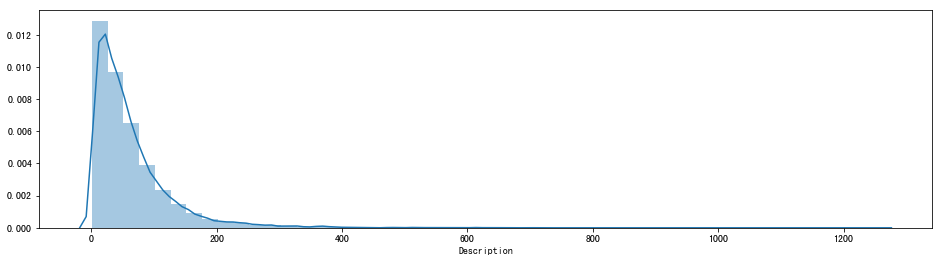

In [32]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax = plt.subplots(figsize=(16,4))
ax = sns.distplot(description_word_len)

In [33]:
add_to_df(description_word_len, 'desc_len')

   Type         Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2       Nibble    3     299       0       1       1       7       0   
1     2  No Name Yet    1     265       0       1       1       2       0   

   MaturitySize  ...   TSVD_91   TSVD_92   TSVD_93   TSVD_94   TSVD_95  \
0             1  ... -0.017540 -0.032603 -0.015945 -0.049061  0.009972   
1             2  ...  0.094446 -0.207372 -0.048833  0.103322 -0.056185   

    TSVD_96   TSVD_97   TSVD_98   TSVD_99  desc_len  
0  0.118430 -0.055865  0.070986 -0.038866        69  
1  0.018377  0.024137 -0.026911  0.029408        23  

[2 rows x 126 columns]
   Type          Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     2  Dopey & Grey    8     266     266       1       2       6       7   
1     2       Chi Chi   36     285     264       2       1       4       7   

   MaturitySize  ...   TSVD_91   TSVD_92   TSVD_93   TSVD_94   TSVD_95  \
0             1  ... -0.052432  0.017348 -0.082061

#### export final data

In [34]:
train.to_csv('train_tx.csv', index=False)
test.to_csv('text_tx.csv', index=False)